In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-and-socio-economic-world-bank/life expectancy.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/life-expectancy-and-socio-economic-world-bank/life expectancy.csv')

In [4]:
df.head(2)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004,NaN,NaN,1392080.71,11190210.53,2663516.34


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

In [6]:
df.isnull().sum()

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Country Name                      0
Country Code                      0
Region                            0
IncomeGroup                       0
Year                              0
Life Expectancy World Bank        0
Prevelance of Undernourishment    0
CO2                               0
Health Expenditure %              0
Education Expenditure %           0
Unemployment                      0
Corruption                        0
Sanitation                        0
Injuries                          0
Communicable                      0
NonCommunicable                   0
dtype: int64

In [9]:
df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
698,Albania,ALB,Europe & Central Asia,Upper middle income,2005,75.228,8.9,4030.000210,6.335542,3.28155,15.970000,3.0,41.875655,94241.87,99241.18,568930.66
702,Armenia,ARM,Europe & Central Asia,Upper middle income,2005,72.626,12.3,4460.000038,5.861883,2.71203,10.203000,2.5,46.657125,92659.79,105444.38,793047.77
707,Azerbaijan,AZE,Europe & Central Asia,Upper middle income,2005,68.747,4.8,30040.000916,2.261077,2.97462,7.260000,2.5,23.121008,240229.35,826520.96,2003781.90
724,Central African Republic,CAF,Sub-Saharan Africa,Low income,2005,44.744,39.6,219.999999,4.367321,1.65222,5.695000,2.5,19.090005,310132.64,3766393.86,805165.65
737,Djibouti,DJI,Middle East & North Africa,Lower middle income,2005,57.991,31.3,430.000007,3.224672,8.36589,27.719999,2.5,25.705269,28409.67,310769.59,115615.60


In [10]:
obj_col=df.describe(include='object').columns

In [11]:
obj_col

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup'], dtype='object')

In [12]:
df.duplicated().value_counts()

False    286
Name: count, dtype: int64

In [13]:
df.shape

(286, 16)

### Univariative Analysis

In [15]:
'''
 Univariative analysis for numerical data.For numerical data boxplot,histplot or kdeplot is used to visualize the graphs.
 Boxplot, is a graphical representation used in Exploratory Data Analysis (EDA) to visualize the distribution, spread,
 and central tendancy of a dataset.The boxplot mainly used to quickly identify potential outliers and gain insightsinto the data's 
 overall shape.
 '''

"\n Univariative analysis for numerical data.For numerical data boxplot,histplot or kdeplot is used to visualize the graphs.\n Boxplot, is a graphical representation used in Exploratory Data Analysis (EDA) to visualize the distribution, spread,\n and central tendancy of a dataset.The boxplot mainly used to quickly identify potential outliers and gain insightsinto the data's \n overall shape.\n "

<Axes: xlabel='Life Expectancy World Bank'>

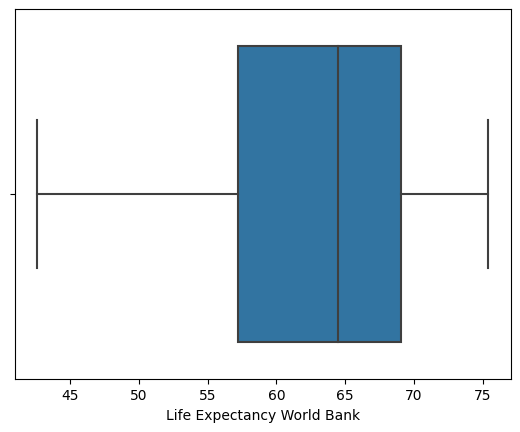

In [16]:
sns.boxplot(x="Life Expectancy World Bank",data=df)


In [ ]:
## Histplot,is to display the distribution of a continuous or numeric variable
## The KDE curve can help you better understand the shape of the distribution.
## Hue,can be useful for visualizing how the distribution of "Life Expectancy World Bank" varies with different levels of "Corruption."

<Axes: xlabel='Life Expectancy World Bank', ylabel='Count'>

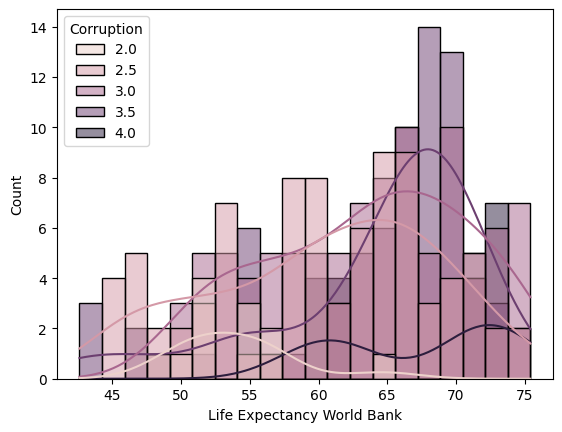

In [17]:
sns.histplot(x="Life Expectancy World Bank",data=df,bins=20,kde=True,hue="Corruption")

In [ ]:
## Kdeplot is used for representation of numeric or continuous variables;
## It provides a smooth, continuous representation of the data's distribution, which can be particularly useful for understanding 
## the underlying shape and characteristics of the data.

/tmp/ipykernel_32/2147567499.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="Life Expectancy World Bank",data=df,shade=True,hue="Corruption")


<Axes: xlabel='Life Expectancy World Bank', ylabel='Density'>

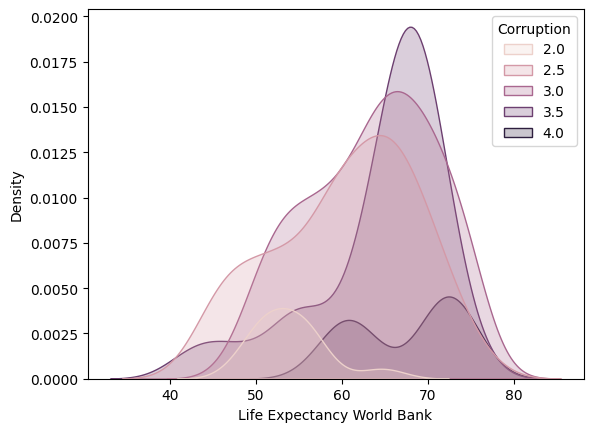

In [18]:
sns.kdeplot(x="Life Expectancy World Bank",data=df,shade=True,hue="Corruption")

In [ ]:
## Univariative analysis for categorical features.For categorical data countplot or piecharts are used to visualize the data.

In [ ]:
'''
countplot is a data visualization technique used to display the counts or frequencies of categorical variables. 
It is particularly useful for summarizing and visualizing the distribution of categorical data, 
showing how many times each category appears in a dataset.
'''

<Axes: xlabel='IncomeGroup', ylabel='count'>

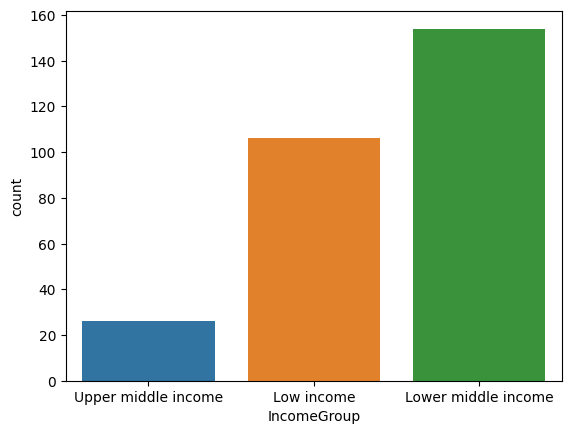

In [19]:
sns.countplot(x="IncomeGroup",data=df)

In [21]:
df.IncomeGroup.value_counts()

IncomeGroup
Lower middle income    154
Low income             106
Upper middle income     26
Name: count, dtype: int64

In [24]:
percentage_IncomeGroup=df.IncomeGroup.value_counts()/len(df)
percentage_IncomeGroup

IncomeGroup
Lower middle income    0.538462
Low income             0.370629
Upper middle income    0.090909
Name: count, dtype: float64

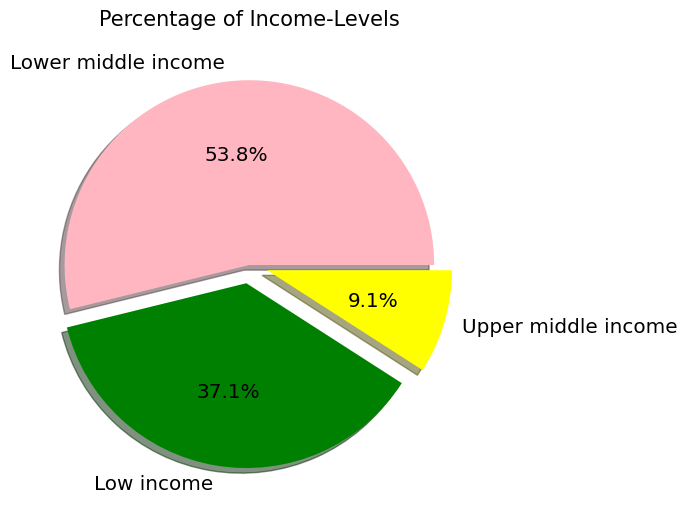

In [27]:
plt.figure(figsize=(12,6))
plt.pie(percentage_IncomeGroup,
        labels=["Lower middle income","Low income","Upper middle income"],
        autopct="%.1f%%",
        explode=[0,0.1,0.1],
        colors=["lightpink","green","yellow"],
        textprops=({'size': 'x-large'}),
        shadow=True);
plt.title("Percentage of Income-Levels",fontsize=15);

### MultiVariative Analysis

In [ ]:
## Numerical and Categorical data

<Axes: xlabel='Life Expectancy World Bank', ylabel='IncomeGroup'>

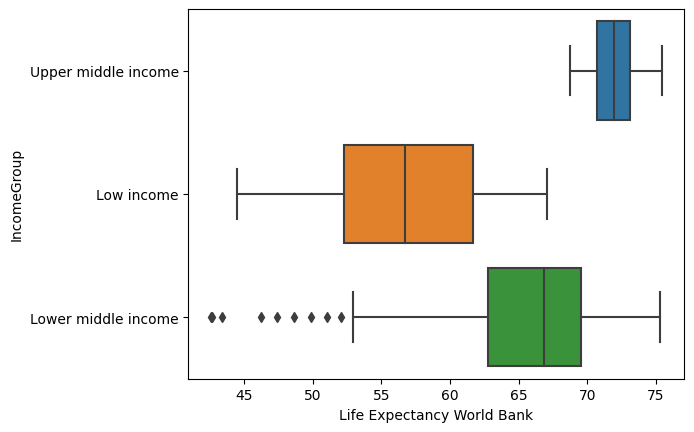

In [28]:
sns.boxplot(x="Life Expectancy World Bank",y="IncomeGroup",data=df)

In [30]:
df.groupby("IncomeGroup")["Life Expectancy World Bank"].describe()

,count,mean,std,min,25%,50%,75%,max
IncomeGroup,,,,,,,,
Low income,106.0,56.655170,6.009841,44.502,52.2730,56.698,61.64425,67.041
Lower middle income,154.0,65.355377,6.614313,42.595,62.7990,66.807,69.50300,75.270
Upper middle income,26.0,71.959654,1.730933,68.747,70.6675,71.935,73.07500,75.423


In [ ]:
## Categorical and Categorical data

In [34]:
df.columns=df.columns.str.replace(" ","_")
df.columns

Index(['Country_Name', 'Country_Code', 'Region', 'IncomeGroup', 'Year',
       'Life_Expectancy_World_Bank', 'Prevelance_of_Undernourishment', 'CO2',
       'Health_Expenditure_%', 'Education_Expenditure_%', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')

In [35]:
df.Country_Name .value_counts()

Country_Name
Nepal                       15
Central African Republic    15
Tanzania                    15
Togo                        15
Sao Tome and Principe       15
Madagascar                  15
Sierra Leone                14
Ghana                       14
Senegal                     14
Ethiopia                    13
Mali                        13
Lesotho                     12
Chad                        12
Mongolia                    12
Samoa                       11
Armenia                      9
Honduras                     9
Georgia                      9
Bangladesh                   9
Malawi                       9
Djibouti                     8
Myanmar                      7
India                        7
Bolivia                      6
Azerbaijan                   6
Albania                      2
Name: count, dtype: int64

In [36]:
df.Country_Name.unique()

array(['Albania', 'Armenia', 'Azerbaijan', 'Central African Republic',
       'Djibouti', 'Georgia', 'Ghana', 'India', 'Lesotho', 'Madagascar',
       'Mali', 'Nepal', 'Senegal', 'Sierra Leone',
       'Sao Tome and Principe', 'Chad', 'Togo', 'Tanzania', 'Bangladesh',
       'Ethiopia', 'Mongolia', 'Samoa', 'Bolivia', 'Honduras', 'Malawi',
       'Myanmar'], dtype=object)

In [41]:
def mapping_Country_Name(x):
    if x in ["Nepal","Central African Republic" ,"Tanzania","Togo","Sao Tome and Principe","Madagascar ","Sierra Leone",
             "Ghana","Senegal","Ethiopia","Mali","Lesotho","Chad","Mongolia","Samoa"]:
        return "Highest population"
    elif x in ["Armenia","Honduras","Georgia","Bangladesh","Malawi","Djibouti"]:
        return "Medium population"
    elif x in ["Myanmar","India","Bolivia","Azerbaijan","Albania"]:
        return "Low population"

In [42]:
df.Country_Name.apply(mapping_Country_Name).value_counts()

Country_Name
Highest population    190
Medium population      53
Low population         28
Name: count, dtype: int64

In [43]:
df["Country_Name"] = df.Country_Name.apply(mapping_Country_Name)
df.head(2)

,Country_Name,Country_Code,Region,IncomeGroup,Year,Life_Expectancy_World_Bank,Prevelance_of_Undernourishment,CO2,Health_Expenditure_%,Education_Expenditure_%,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
698,Low population,ALB,Europe & Central Asia,Upper middle income,2005,75.228,8.9,4030.000210,6.335542,3.28155,15.970,3.0,41.875655,94241.87,99241.18,568930.66
702,Medium population,ARM,Europe & Central Asia,Upper middle income,2005,72.626,12.3,4460.000038,5.861883,2.71203,10.203,2.5,46.657125,92659.79,105444.38,793047.77


<Axes: xlabel='Country_Name', ylabel='count'>

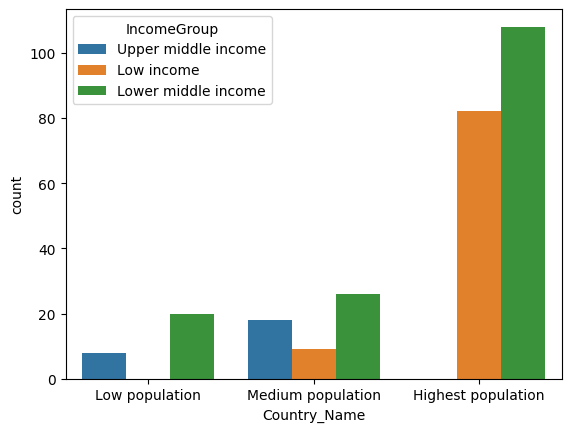

In [44]:
sns.countplot(x="Country_Name",data=df,hue="IncomeGroup")

In [46]:
df.groupby("Country_Name")["IncomeGroup"].value_counts()

Country_Name        IncomeGroup        
Highest population  Lower middle income    108
                    Low income              82
Low population      Lower middle income     20
                    Upper middle income      8
Medium population   Lower middle income     26
                    Upper middle income     18
                    Low income               9
Name: count, dtype: int64

In [47]:
(df.groupby("Country_Name")["IncomeGroup"]).count()

Country_Name
Highest population    190
Low population         28
Medium population      53
Name: IncomeGroup, dtype: int64

In [48]:
percentage=(df.groupby("Country_Name")["IncomeGroup"]).value_counts()/(df.groupby("Country_Name")["IncomeGroup"]).count()
percentage

Country_Name        IncomeGroup        
Highest population  Lower middle income    0.568421
                    Low income             0.431579
Low population      Lower middle income    0.714286
                    Upper middle income    0.285714
Medium population   Lower middle income    0.490566
                    Upper middle income    0.339623
                    Low income             0.169811
dtype: float64

In [49]:
high=((df.groupby("Country_Name")["IncomeGroup"]).value_counts()/(df.groupby("Country_Name")["IncomeGroup"]).count())[:2]

In [50]:
high

Country_Name        IncomeGroup        
Highest population  Lower middle income    0.568421
                    Low income             0.431579
dtype: float64

In [51]:
med=((df.groupby("Country_Name")["IncomeGroup"]).value_counts()/(df.groupby("Country_Name")["IncomeGroup"]).count())[2:4]
med

Country_Name    IncomeGroup        
Low population  Lower middle income    0.714286
                Upper middle income    0.285714
dtype: float64

In [52]:
low=((df.groupby("Country_Name")["IncomeGroup"]).value_counts()/(df.groupby("Country_Name")["IncomeGroup"]).count())[4:]

In [53]:
low

Country_Name       IncomeGroup        
Medium population  Lower middle income    0.490566
                   Upper middle income    0.339623
                   Low income             0.169811
dtype: float64

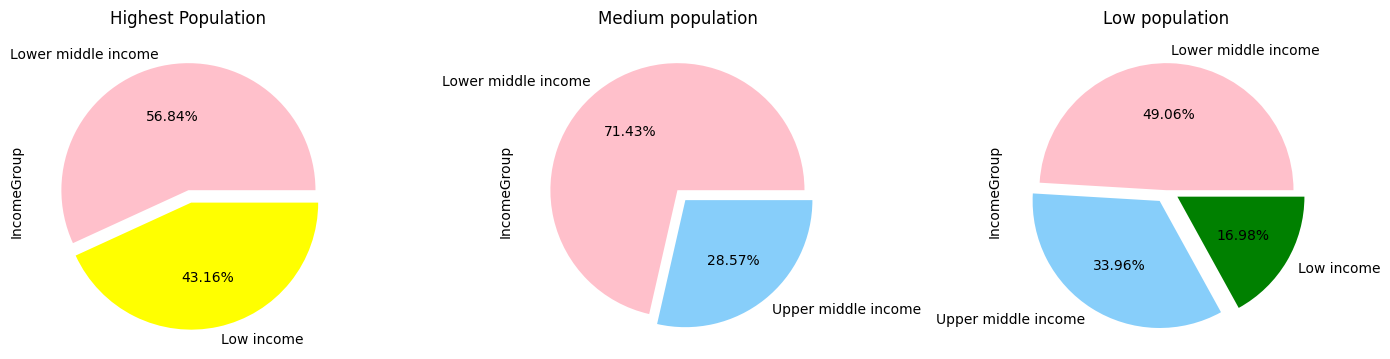

In [63]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,6))
ax1.pie(x=high,labels=["Lower middle income","Low income"],autopct="%.2f%%", explode=[0,0.1]
        ,colors=["pink","yellow"])
ax1.set_title("Highest Population")
ax1.set_ylabel("IncomeGroup")
ax2.pie(x=med,labels=["Lower middle income","Upper middle income"],autopct="%.2f%%", explode=[0,0.1],
        colors=["pink","lightskyblue","green"])
ax2.set_title("Medium population")
ax2.set_ylabel("IncomeGroup")
ax3.pie(x=low,labels=["Lower middle income","Upper middle income","Low income"],autopct="%.2f%%", explode=[0,0.1,0.1],
        colors=["pink","lightskyblue","green"])
ax3.set_title("Low population")
ax3.set_ylabel("IncomeGroup");

plt.tight_layout()
plt.show()

In [ ]:
## Numerical and Numerical data

<Axes: xlabel='Life_Expectancy_World_Bank', ylabel='Corruption'>

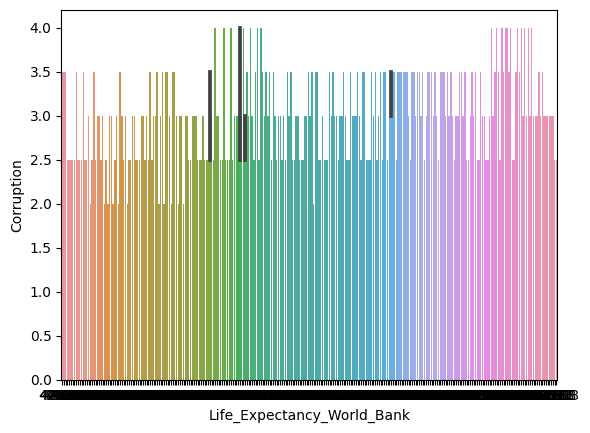

In [64]:
sns.barplot(x="Life_Expectancy_World_Bank",y="Corruption",data=df)

<Axes: xlabel='Life_Expectancy_World_Bank', ylabel='Corruption'>

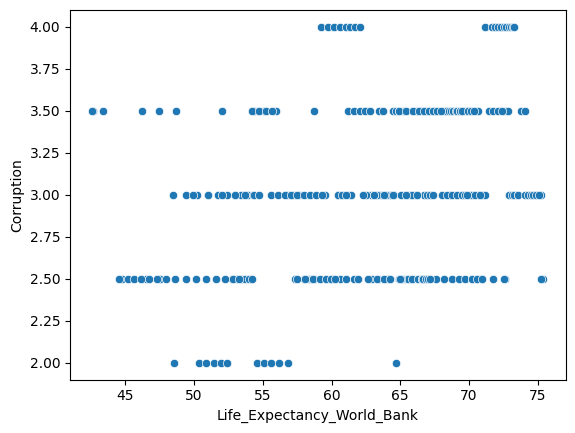

In [65]:
sns.scatterplot(x="Life_Expectancy_World_Bank",y="Corruption",data=df)